In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 19 10:48:51 2021

@author: ashleyansley
"""
# import pandas
import csv
import pandas as pd
import matplotlib as plot
import numpy as np
from scipy import stats
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA 
# Read time series 
exchangeRateSeries = pd.read_csv('/Users/ashleyansley/euro-usd.csv', header=0, parse_dates=[0], index_col=0)
print(exchangeRateSeries)

/Users/ashleyansley
             value
date              
1999-01-04  1.1825
1999-01-05  1.1774
1999-01-06  1.1622
1999-01-07  1.1706
1999-01-08  1.1577
...            ...
2021-04-14  1.1980
2021-04-15  1.1969
2021-04-16  1.1982
2021-04-17  1.1982
2021-04-19  1.2039

[5862 rows x 1 columns]


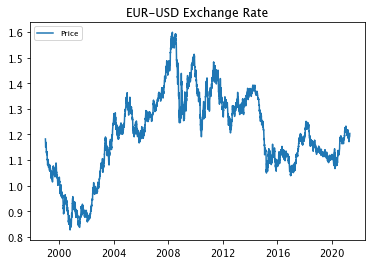

In [2]:
# TIME SERIES 

# Plot time series
import matplotlib.pyplot as plt
plt.plot(exchangeRateSeries, label='Price')
plt.title('EUR-USD Exchange Rate')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#We can see that this is non-sationary with seasonality

#Need to stabalize mean

#Can also see Euro stronger than USD overtime since appears above 1 overall

In [3]:
# STATISTICS

# Look at series Statistics and draw conclusion

exchangeRateSeries.describe()

#Mean >1 confirms EUR stronger than USD over time. 

,value
count,5862.000000
mean,1.197871
std,0.158694
min,0.827100
25%,1.102150
50%,1.195300
75%,1.315200
max,1.599400


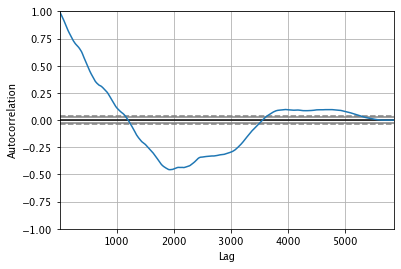

In [4]:
# AUTOCORRELATION PLOT

# Lets look at the autocorrelation plot series as well
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(exchangeRateSeries)
pyplot.show()

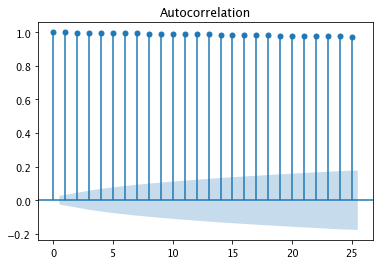

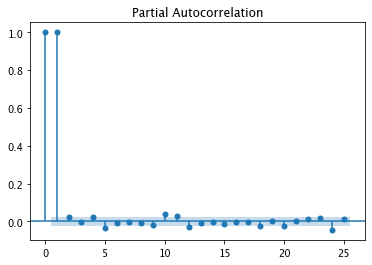

In [5]:
# Plotting ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Make ACF plot
plot_acf(exchangeRateSeries, lags=25)
pyplot.show()

# Make PACF plot
plot_pacf(exchangeRateSeries, lags=25)
pyplot.show()

#PACF with signficant lag at 1, ACF not decaying exponentially in ideal way
#Confirms that differencing is needed

In [6]:
# DIFFERENCED SERIES

# create a differenced series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas as pd
from pandas import Series
import os
print(os.getcwd())

# first, we will have to define difference, which will require a for loop
def difference(exchangeRateSeries, interval=1):
	diff = list()
	for i in range(interval, len(exchangeRateSeries)):
		value = exchangeRateSeries[i] - exchangeRateSeries[i - interval]
		diff.append(value)
	return Series(diff)

/Users/ashleyansley


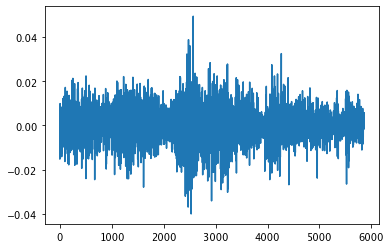

In [7]:
# DIFFERENCED PLOTS

# We can now plot the differenced series 

X = exchangeRateSeries.values
diff = difference(X)
pyplot.plot(diff)
pyplot.show()

# The differenced data clearly shows more constant mean and variance, which achieves stationarity. 

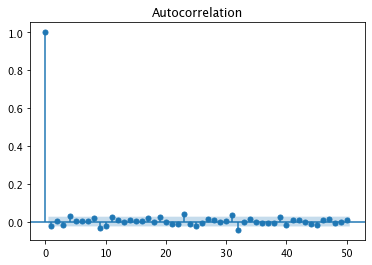

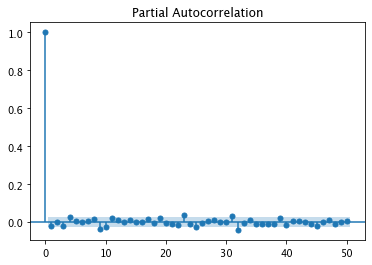

In [8]:
# ACF AND PACF ON DIFFERENCED 

# We will now analyze the ACF and PACF plots on the differenced data 

# ACF plot
plot_acf(diff, lags=50)
pyplot.show()
# PACF plot
plot_pacf(diff, lags=50)
pyplot.show()

# Both are damped sinusoidal
# Would suggest an ARIMA (1,1,1) model 

In [9]:
# BUILDING ARIMA MODEL

# First, we will need to fit an ARIMA Model
# ARIMA model in StatsModels package used to predict/forecast exchange rate

from statsmodels.tsa.arima_model import ARIMA 
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [10]:
# Predict next value (example)

ExchangeRate = [[1],[1.5],[2],[4.5],[0.8],[1.8],[2],[0.5]]
predicted = StartARIMAForecasting(ExchangeRate, 1,0,0)

# display the value
print('Predicted=%f' % (predicted))

Predicted=2.115804


In [11]:
# ARIMA MODEL SUMMARY COMPARISONS

# Compare and look at parameters as well as AIC and BIC values
# ARIMA Model with no differencing  (ARIMA 1,0,0)

model = ARIMA(exchangeRateSeries, order=(1,0,0))
model_fit = model.fit()

# print summary of fit model

print(model_fit.summary())

# pvalue for phi coeff. is insignificant, but pvalue of interept sig.
# prefer insignif pvalue for intercept

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                 5862
Model:                     ARMA(1, 0)   Log Likelihood               20545.358
Method:                       css-mle   S.D. of innovations              0.007
Date:                Tue, 19 Apr 2022   AIC                         -41084.717
Time:                        01:31:42   BIC                         -41064.688
Sample:                             0   HQIC                        -41077.753
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1968      0.070     17.115      0.000       1.060       1.334
ar.L1. value     0.9988      0.001   1770.674      0.000       0.998       1.000
                                    Roots   

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [12]:
# ARIMA Model with 1st order differecning (ARIMA 1,1,1)

model = ARIMA(exchangeRateSeries, order=(1,1,1))
model_fit = model.fit()

# print summary of fit model

print(model_fit.summary())

#Lower AIC and BIC
#Insignificant pvalue for intercept and phi coefficients
#Prefer this model 

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:               D. value   No. Observations:                 5861
Model:                 ARIMA(1, 1, 1)   Log Likelihood               20545.300
Method:                       css-mle   S.D. of innovations              0.007
Date:                Tue, 19 Apr 2022   AIC                         -41082.601
Time:                        01:31:44   BIC                         -41055.896
Sample:                             1   HQIC                        -41073.316
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.617e-06   9.39e-05      0.039      0.969      -0.000       0.000
ar.L1.D. value    -0.7688      0.139     -5.532      0.000      -1.041      -0.496
ma.L1.D. value     0.7504      0.144

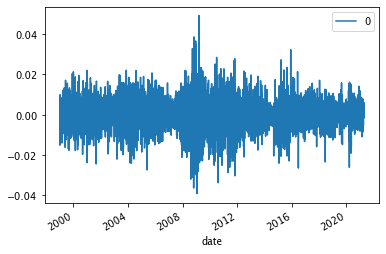

In [13]:
# RESIDUALS ON FITTED MODEL

# Plot residual errors to esure there is no trend
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# Lots of seasonality, indicating no specific trend here. 

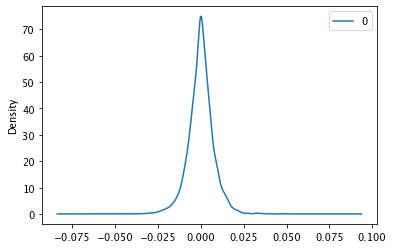

In [14]:
# Density plot of residual error values

residuals.plot(kind='kde')
pyplot.show()

# Errors indicate Gaussian distribution with errors centered at zero.
# Good model 

In [15]:
# summary stats of residuals

print(residuals.describe())

# Mean less than 0, no bias here

                  0
count  5.861000e+03
mean   2.203934e-08
std    7.267966e-03
min   -3.946550e-02
25%   -3.970434e-03
50%    3.290002e-05
75%    3.927738e-03
max    4.934380e-02


In [16]:
#TRAINING SET WITH ARIMA TO FORECAST FOREX RATES

def GetData(fileName):
    return pd.read_csv('/Users/ashleyansley/euro-usd.csv', header=0, 
                       parse_dates=[0], index_col=0).values
    
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [17]:
# Get exchange rates

ActualData = GetData('euro-usd.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)
# Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.70)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]
# New arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

In [20]:
#Build ARIMA Model on Trained set to forcast and predict, then plot 

# In a for loop, predict values using ARIMA model (aka ARMA 1,1 differenced by 1...ARIMA 1,1,1)

for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,1) 
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual=1.080800, Predicted=1.072632
Actual=1.073600, Predicted=1.080412
Actual=1.073400, Predicted=1.073990
Actual=1.072400, Predicted=1.073083
Actual=1.082300, Predicted=1.072602
Actual=1.087000, Predicted=1.081897
Actual=1.088700, Predicted=1.087144
Actual=1.098100, Predicted=1.088522
Actual=1.112500, Predicted=1.097987
Actual=1.122100, Predicted=1.112241
Actual=1.119800, Predicted=1.122056
Actual=1.114800, Predicted=1.119854
Actual=1.118400, Predicted=1.114839
Actual=1.134700, Predicted=1.118270
Actual=1.126500, Predicted=1.134432
Actual=1.120900, Predicted=1.126845
Actual=1.115300, Predicted=1.120748
Actual=1.121300, Predicted=1.115499
Actual=1.135100, Predicted=1.121005
Actual=1.140700, Predicted=1.135002
Actual=1.144500, Predicted=1.140636
Actual=1.131300, Predicted=1.144451
Actual=1.114800, Predicted=1.131589
Actual=1.109500, Predicted=1.114905
Actual=1.111200, Predicted=1.109502
Actual=1.101500, Predicted=1.111135
Actual=1.087400, Predicted=1.101710
Actual=1.090400, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.096400, Predicted=1.101549
Actual=1.086600, Predicted=1.096464
Actual=1.088400, Predicted=1.086770
Actual=1.074100, Predicted=1.088393
Actual=1.075200, Predicted=1.074330
Actual=1.072400, Predicted=1.075213
Actual=1.074300, Predicted=1.072432
Actual=1.081400, Predicted=1.074254
Actual=1.077300, Predicted=1.081247
Actual=1.068600, Predicted=1.077319
Actual=1.064200, Predicted=1.068737
Actual=1.066000, Predicted=1.064287
Actual=1.073400, Predicted=1.065968
Actual=1.064600, Predicted=1.073244
Actual=1.063600, Predicted=1.064697
Actual=1.064300, Predicted=1.063620
Actual=1.062400, Predicted=1.064271
Actual=1.061000, Predicted=1.062406
Actual=1.059300, Predicted=1.061005
Actual=1.056500, Predicted=1.059309
Actual=1.063300, Predicted=1.056529
Actual=1.061500, Predicted=1.063166
Actual=1.094000, Predicted=1.061479
Actual=1.088100, Predicted=1.093399
Actual=1.083700, Predicted=1.088059
Actual=1.089200, Predicted=1.083752
Actual=1.102500, Predicted=1.089093
Actual=1.094100, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.101300, Predicted=1.102042
Actual=1.101800, Predicted=1.101309
Actual=1.093400, Predicted=1.101779
Actual=1.087300, Predicted=1.093532
Actual=1.086800, Predicted=1.087425
Actual=1.086800, Predicted=1.086822
Actual=1.095700, Predicted=1.086789
Actual=1.100500, Predicted=1.095522
Actual=1.101400, Predicted=1.100357
Actual=1.101100, Predicted=1.101335
Actual=1.099900, Predicted=1.101076
Actual=1.117700, Predicted=1.099901
Actual=1.115600, Predicted=1.117370
Actual=1.110300, Predicted=1.115547
Actual=1.110900, Predicted=1.110369
Actual=1.122400, Predicted=1.110894
Actual=1.131800, Predicted=1.122181
Actual=1.127000, Predicted=1.131571
Actual=1.124100, Predicted=1.127017
Actual=1.121700, Predicted=1.124146


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.118100, Predicted=1.121744
Actual=1.117400, Predicted=1.118165
Actual=1.116700, Predicted=1.117418
Actual=1.119600, Predicted=1.116706
Actual=1.129100, Predicted=1.119540
Actual=1.133800, Predicted=1.128908
Actual=1.138000, Predicted=1.133660
Actual=1.139100, Predicted=1.137883
Actual=1.139100, Predicted=1.139044
Actual=1.138400, Predicted=1.139078
Actual=1.139900, Predicted=1.138399
Actual=1.137800, Predicted=1.139867
Actual=1.139900, Predicted=1.137820
Actual=1.140800, Predicted=1.139862
Actual=1.138600, Predicted=1.140767
Actual=1.127400, Predicted=1.138622
Actual=1.126800, Predicted=1.127591
Actual=1.128400, Predicted=1.126851
Actual=1.131300, Predicted=1.128377
Actual=1.135800, Predicted=1.131235
Actual=1.129700, Predicted=1.135698
Actual=1.128800, Predicted=1.129770
Actual=1.122200, Predicted=1.128825
Actual=1.126800, Predicted=1.122311
Actual=1.129700, Predicted=1.126740
Actual=1.132200, Predicted=1.129625
Actual=1.135200, Predicted=1.132128
Actual=1.145100, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.135500, Predicted=1.136323
Actual=1.135800, Predicted=1.135417
Actual=1.139500, Predicted=1.135766
Actual=1.131600, Predicted=1.139420
Actual=1.125100, Predicted=1.131710
Actual=1.129200, Predicted=1.125231
Actual=1.120700, Predicted=1.129154
Actual=1.126000, Predicted=1.120827
Actual=1.122500, Predicted=1.125929
Actual=1.127700, Predicted=1.122534
Actual=1.131400, Predicted=1.127607
Actual=1.124200, Predicted=1.131303
Actual=1.129600, Predicted=1.124294
Actual=1.138500, Predicted=1.129517
Actual=1.111700, Predicted=1.138313
Actual=1.102500, Predicted=1.112140
Actual=1.106500, Predicted=1.102761
Actual=1.112500, Predicted=1.106487
Actual=1.110600, Predicted=1.112378
Actual=1.113600, Predicted=1.110589
Actual=1.115400, Predicted=1.113532
Actual=1.107600, Predicted=1.115338
Actual=1.110000, Predicted=1.107712
Actual=1.106300, Predicted=1.109976
Actual=1.105100, Predicted=1.106348
Actual=1.105800, Predicted=1.105122
Actual=1.106100, Predicted=1.105781
Actual=1.109000, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.118900, Predicted=1.119942
Actual=1.114300, Predicted=1.118942
Actual=1.115800, Predicted=1.114383
Actual=1.119700, Predicted=1.115783
Actual=1.115600, Predicted=1.119614
Actual=1.114700, Predicted=1.115642
Actual=1.125500, Predicted=1.114716
Actual=1.123900, Predicted=1.125297
Actual=1.126000, Predicted=1.123867
Actual=1.123300, Predicted=1.125944
Actual=1.123500, Predicted=1.123326
Actual=1.122000, Predicted=1.123493


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.125000, Predicted=1.122016
Actual=1.124400, Predicted=1.124939
Actual=1.115500, Predicted=1.124386
Actual=1.117500, Predicted=1.115650
Actual=1.115100, Predicted=1.117491
Actual=1.118900, Predicted=1.115131
Actual=1.120800, Predicted=1.118827
Actual=1.122600, Predicted=1.120736
Actual=1.125400, Predicted=1.122540
Actual=1.121500, Predicted=1.125324
Actual=1.121700, Predicted=1.121542
Actual=1.122200, Predicted=1.121697
Actual=1.123500, Predicted=1.122180
Actual=1.121100, Predicted=1.123461
Actual=1.120400, Predicted=1.121124
Actual=1.120500, Predicted=1.120409
Actual=1.115100, Predicted=1.120490
Actual=1.120100, Predicted=1.115186
Actual=1.113900, Predicted=1.120019
Actual=1.105400, Predicted=1.113984
Actual=1.100700, Predicted=1.105566
Actual=1.105600, Predicted=1.100815
Actual=1.097200, Predicted=1.105527
Actual=1.100000, Predicted=1.097323
Actual=1.098100, Predicted=1.099965
Actual=1.097400, Predicted=1.098113
Actual=1.092900, Predicted=1.097402
Actual=1.088400, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.090800, Predicted=1.088874
Actual=1.089700, Predicted=1.090743
Actual=1.098500, Predicted=1.089691
Actual=1.098100, Predicted=1.098320
Actual=1.105500, Predicted=1.098049
Actual=1.109800, Predicted=1.105337
Actual=1.110500, Predicted=1.109669
Actual=1.114100, Predicted=1.110444
Actual=1.104100, Predicted=1.114009
Actual=1.102600, Predicted=1.104251
Actual=1.091000, Predicted=1.102651
Actual=1.089300, Predicted=1.091210
Actual=1.085500, Predicted=1.089365
Actual=1.073700, Predicted=1.085568
Actual=1.072200, Predicted=1.073910
Actual=1.069100, Predicted=1.072254
Actual=1.062600, Predicted=1.069148
Actual=1.058800, Predicted=1.062706
Actual=1.063000, Predicted=1.058869
Actual=1.062700, Predicted=1.062919
Actual=1.055300, Predicted=1.062667
Actual=1.055400, Predicted=1.055404
Actual=1.058900, Predicted=1.055399
Actual=1.061400, Predicted=1.058816
Actual=1.065000, Predicted=1.061316
Actual=1.058900, Predicted=1.064897
Actual=1.066100, Predicted=1.058966
Actual=1.066400, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.049000, Predicted=1.041348
Actual=1.051700, Predicted=1.048847
Actual=1.045500, Predicted=1.051595
Actual=1.040500, Predicted=1.045567
Actual=1.048900, Predicted=1.040582
Actual=1.060700, Predicted=1.048742


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.053200, Predicted=1.060431
Actual=1.057400, Predicted=1.053251
Actual=1.055400, Predicted=1.057314
Actual=1.058200, Predicted=1.055396
Actual=1.061300, Predicted=1.058127
Actual=1.064300, Predicted=1.061206
Actual=1.060100, Predicted=1.064203
Actual=1.071300, Predicted=1.060134
Actual=1.063000, Predicted=1.071081
Actual=1.066400, Predicted=1.063087
Actual=1.070300, Predicted=1.066335
Actual=1.076500, Predicted=1.070193
Actual=1.073100, Predicted=1.076342
Actual=1.074800, Predicted=1.073111
Actual=1.068200, Predicted=1.074752
Actual=1.069900, Predicted=1.068295
Actual=1.069500, Predicted=1.069870
Actual=1.079800, Predicted=1.069482
Actual=1.076900, Predicted=1.079583
Actual=1.075900, Predicted=1.076890
Actual=1.078300, Predicted=1.075899
Actual=1.075000, Predicted=1.078236
Actual=1.068300, Predicted=1.075031
Actual=1.069800, Predicted=1.068415
Actual=1.065500, Predicted=1.069778
Actual=1.064300, Predicted=1.065557
Actual=1.059800, Predicted=1.064315


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.057800, Predicted=1.059868
Actual=1.060100, Predicted=1.057831
Actual=1.067400, Predicted=1.060042
Actual=1.061600, Predicted=1.067230
Actual=1.061400, Predicted=1.061653
Actual=1.053600, Predicted=1.061395
Actual=1.055800, Predicted=1.053726
Actual=1.058200, Predicted=1.055764
Actual=1.056300, Predicted=1.058125
Actual=1.058700, Predicted=1.056299
Actual=1.057600, Predicted=1.058633
Actual=1.054700, Predicted=1.057585
Actual=1.050700, Predicted=1.054731
Actual=1.062200, Predicted=1.050761
Actual=1.058200, Predicted=1.061972
Actual=1.056600, Predicted=1.058206
Actual=1.054100, Predicted=1.056611
Actual=1.057700, Predicted=1.054129
Actual=1.067300, Predicted=1.057616
Actual=1.065300, Predicted=1.067076
Actual=1.060400, Predicted=1.065269
Actual=1.073400, Predicted=1.060467
Actual=1.076600, Predicted=1.073143
Actual=1.073800, Predicted=1.076462
Actual=1.073900, Predicted=1.073805
Actual=1.081100, Predicted=1.073881
Actual=1.079700, Predicted=1.080939
Actual=1.078300, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.064400, Predicted=1.066294
Actual=1.059100, Predicted=1.064416
Actual=1.059600, Predicted=1.059185
Actual=1.060500, Predicted=1.059590


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.066500, Predicted=1.060460
Actual=1.061300, Predicted=1.066356
Actual=1.061800, Predicted=1.061347
Actual=1.064300, Predicted=1.061782
Actual=1.073000, Predicted=1.064228


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.071100, Predicted=1.072797
Actual=1.071700, Predicted=1.071070
Actual=1.072800, Predicted=1.071663
Actual=1.086800, Predicted=1.072752
Actual=1.092600, Predicted=1.086503
Actual=1.090400, Predicted=1.092406
Actual=1.087300, Predicted=1.090380
Actual=1.089500, Predicted=1.087339
Actual=1.089900, Predicted=1.089452
Actual=1.093000, Predicted=1.089866
Actual=1.088600, Predicted=1.092918
Actual=1.098500, Predicted=1.088649
Actual=1.099800, Predicted=1.098308
Actual=1.092400, Predicted=1.099716
Actual=1.087400, Predicted=1.092507
Actual=1.086800, Predicted=1.087506
Actual=1.086100, Predicted=1.086822
Actual=1.093100, Predicted=1.086103
Actual=1.097500, Predicted=1.092953
Actual=1.108300, Predicted=1.097366
Actual=1.115900, Predicted=1.108053
Actual=1.110300, Predicted=1.115690
Actual=1.120600, Predicted=1.110341
Actual=1.123700, Predicted=1.120406
Actual=1.118300, Predicted=1.123587


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.121900, Predicted=1.118364
Actual=1.121000, Predicted=1.121837
Actual=1.118300, Predicted=1.120992
Actual=1.116400, Predicted=1.118339
Actual=1.118600, Predicted=1.116434
Actual=1.124400, Predicted=1.118556
Actual=1.121300, Predicted=1.124271
Actual=1.127900, Predicted=1.121318
Actual=1.125400, Predicted=1.127770
Actual=1.127700, Predicted=1.125408
Actual=1.125700, Predicted=1.127649
Actual=1.121400, Predicted=1.125717
Actual=1.119500, Predicted=1.121476
Actual=1.120300, Predicted=1.119543
Actual=1.121100, Predicted=1.120285
Actual=1.121800, Predicted=1.121071
Actual=1.114500, Predicted=1.121770
Actual=1.119800, Predicted=1.114621
Actual=1.114900, Predicted=1.119717
Actual=1.113400, Predicted=1.114964
Actual=1.116800, Predicted=1.113432
Actual=1.115200, Predicted=1.116731
Actual=1.119400, Predicted=1.115204
Actual=1.118200, Predicted=1.119310
Actual=1.133900, Predicted=1.118192
Actual=1.137800, Predicted=1.133588
Actual=1.144100, Predicted=1.137649
Actual=1.142600, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.147800, Predicted=1.146865
Actual=1.155400, Predicted=1.147748
Actual=1.151500, Predicted=1.155239
Actual=1.163100, Predicted=1.151533
Actual=1.166300, Predicted=1.162881
Actual=1.164200, Predicted=1.166189
Actual=1.164700, Predicted=1.164213
Actual=1.173400, Predicted=1.164690
Actual=1.167700, Predicted=1.173230
Actual=1.175100, Predicted=1.167771
Actual=1.184200, Predicted=1.174970
Actual=1.180200, Predicted=1.183998
Actual=1.185600, Predicted=1.180234
Actual=1.187000, Predicted=1.185503
Actual=1.177300, Predicted=1.186954
Actual=1.179500, Predicted=1.177478
Actual=1.175200, Predicted=1.179494
Actual=1.175900, Predicted=1.175281
Actual=1.177200, Predicted=1.175902
Actual=1.182100, Predicted=1.177174
Actual=1.178000, Predicted=1.181999
Actual=1.173500, Predicted=1.178059
Actual=1.176700, Predicted=1.173599
Actual=1.172300, Predicted=1.176657
Actual=1.176100, Predicted=1.172376
Actual=1.181500, Predicted=1.176040
Actual=1.176200, Predicted=1.181381
Actual=1.180700, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.195300, Predicted=1.203535
Actual=1.196700, Predicted=1.195451
Actual=1.188500, Predicted=1.196707
Actual=1.191900, Predicted=1.188664
Actual=1.194500, Predicted=1.191869
Actual=1.195400, Predicted=1.194444
Actual=1.199400, Predicted=1.195372
Actual=1.189200, Predicted=1.199318
Actual=1.194100, Predicted=1.189387
Actual=1.195100, Predicted=1.194043
Actual=1.184800, Predicted=1.195070
Actual=1.179300, Predicted=1.185001
Actual=1.174500, Predicted=1.179452
Actual=1.178600, Predicted=1.174625
Actual=1.181400, Predicted=1.178545
Actual=1.173300, Predicted=1.181332
Actual=1.174400, Predicted=1.173445
Actual=1.175900, Predicted=1.174408
Actual=1.171100, Predicted=1.175871
Actual=1.173000, Predicted=1.171188
Actual=1.174000, Predicted=1.172979
Actual=1.180800, Predicted=1.173974
Actual=1.185900, Predicted=1.180658
Actual=1.183000, Predicted=1.185769
Actual=1.182000, Predicted=1.183029
Actual=1.179600, Predicted=1.182026
Actual=1.176600, Predicted=1.179653
Actual=1.178700, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.189600, Predicted=1.190291
Actual=1.186600, Predicted=1.189592
Actual=1.182600, Predicted=1.186659
Actual=1.179600, Predicted=1.182694
Actual=1.177300, Predicted=1.179681
Actual=1.177300, Predicted=1.177364
Actual=1.176900, Predicted=1.177314
Actual=1.174200, Predicted=1.176910
Actual=1.182600, Predicted=1.174255
Actual=1.177800, Predicted=1.182445
Actual=1.174900, Predicted=1.177860
Actual=1.178200, Predicted=1.174971
Actual=1.184000, Predicted=1.178150
Actual=1.187100, Predicted=1.183872
Actual=1.187400, Predicted=1.187009
Actual=1.186200, Predicted=1.187373
Actual=1.187000, Predicted=1.186218
Actual=1.185800, Predicted=1.186989
Actual=1.188800, Predicted=1.185822
Actual=1.194300, Predicted=1.188746
Actual=1.200500, Predicted=1.194179
Actual=1.201200, Predicted=1.200351
Actual=1.205900, Predicted=1.201154
Actual=1.201500, Predicted=1.205800
Actual=1.206800, Predicted=1.201567
Actual=1.202900, Predicted=1.206714
Actual=1.196700, Predicted=1.202961
Actual=1.193700, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.203200, Predicted=1.194802
Actual=1.220200, Predicted=1.203037
Actual=1.226400, Predicted=1.219838
Actual=1.226000, Predicted=1.226204
Actual=1.218600, Predicted=1.225967
Actual=1.223800, Predicted=1.218737
Actual=1.222200, Predicted=1.223741


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.226200, Predicted=1.222222
Actual=1.229900, Predicted=1.226136


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.240800, Predicted=1.229821
Actual=1.239600, Predicted=1.240583
Actual=1.242700, Predicted=1.239579
Actual=1.238300, Predicted=1.242646
Actual=1.240200, Predicted=1.238379
Actual=1.241400, Predicted=1.240192
Actual=1.251000, Predicted=1.241384
Actual=1.246300, Predicted=1.250825
Actual=1.236700, Predicted=1.246358
Actual=1.237700, Predicted=1.236905
Actual=1.226400, Predicted=1.237741
Actual=1.224700, Predicted=1.226632
Actual=1.225200, Predicted=1.224794
Actual=1.229200, Predicted=1.225220
Actual=1.235200, Predicted=1.229136
Actual=1.245100, Predicted=1.235079
Actual=1.250600, Predicted=1.244896
Actual=1.240600, Predicted=1.250460
Actual=1.240700, Predicted=1.240760
Actual=1.233700, Predicted=1.240747
Actual=1.228400, Predicted=1.233850
Actual=1.233000, Predicted=1.228542
Actual=1.229700, Predicted=1.232958
Actual=1.229700, Predicted=1.229758
Actual=1.229000, Predicted=1.229722
Actual=1.232000, Predicted=1.229026
Actual=1.223200, Predicted=1.231958
Actual=1.220000, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.221300, Predicted=1.227936
Actual=1.224300, Predicted=1.221441
Actual=1.217600, Predicted=1.224286
Actual=1.211200, Predicted=1.217730
Actual=1.213100, Predicted=1.211359
Actual=1.213100, Predicted=1.213110
Actual=1.212400, Predicted=1.213107
Actual=1.208500, Predicted=1.212420
Actual=1.199500, Predicted=1.208583
Actual=1.195600, Predicted=1.199694
Actual=1.199300, Predicted=1.195725
Actual=1.196600, Predicted=1.199266
Actual=1.196600, Predicted=1.196644
Actual=1.196000, Predicted=1.196614
Actual=1.194200, Predicted=1.196017
Actual=1.187100, Predicted=1.194240
Actual=1.185000, Predicted=1.187245
Actual=1.191900, Predicted=1.185077
Actual=1.194900, Predicted=1.191792
Actual=1.194900, Predicted=1.194817
Actual=1.195500, Predicted=1.194880
Actual=1.193600, Predicted=1.195485
Actual=1.182600, Predicted=1.193634
Actual=1.181900, Predicted=1.182815
Actual=1.179500, Predicted=1.181970
Actual=1.177300, Predicted=1.179563
Actual=1.177300, Predicted=1.177357
Actual=1.177000, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.172600, Predicted=1.171344
Actual=1.166600, Predicted=1.172611
Actual=1.166600, Predicted=1.166712
Actual=1.169200, Predicted=1.166627
Actual=1.162900, Predicted=1.169157
Actual=1.154200, Predicted=1.163004
Actual=1.166900, Predicted=1.154384
Actual=1.169600, Predicted=1.166707
Actual=1.166600, Predicted=1.169496
Actual=1.166600, Predicted=1.166626
Actual=1.167100, Predicted=1.166605
Actual=1.170400, Predicted=1.167090
Actual=1.172900, Predicted=1.170333
Actual=1.178600, Predicted=1.172833
Actual=1.179700, Predicted=1.178474
Actual=1.177000, Predicted=1.179645
Actual=1.177000, Predicted=1.177035
Actual=1.178400, Predicted=1.177009
Actual=1.177800, Predicted=1.178375
Actual=1.175100, Predicted=1.177804
Actual=1.180800, Predicted=1.175151
Actual=1.157000, Predicted=1.180706
Actual=1.160500, Predicted=1.157430
Actual=1.160500, Predicted=1.160542
Actual=1.159700, Predicted=1.160508
Actual=1.163300, Predicted=1.159714
Actual=1.159400, Predicted=1.163231
Actual=1.158200, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.136500, Predicted=1.143063
Actual=1.133700, Predicted=1.136610
Actual=1.133700, Predicted=1.133778
Actual=1.122300, Predicted=1.133716
Actual=1.129500, Predicted=1.122514
Actual=1.131300, Predicted=1.129414
Actual=1.132900, Predicted=1.131234
Actual=1.142100, Predicted=1.132843
Actual=1.142100, Predicted=1.141901
Actual=1.145300, Predicted=1.142038
Actual=1.136700, Predicted=1.145216
Actual=1.138300, Predicted=1.136836
Actual=1.140500, Predicted=1.138301


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.134200, Predicted=1.140452
Actual=1.134200, Predicted=1.134302
Actual=1.133100, Predicted=1.134222
Actual=1.129400, Predicted=1.133121
Actual=1.136800, Predicted=1.129470
Actual=1.138800, Predicted=1.136669
Actual=1.131800, Predicted=1.138718
Actual=1.131800, Predicted=1.131906
Actual=1.135300, Predicted=1.131823
Actual=1.134100, Predicted=1.135232
Actual=1.134700, Predicted=1.134097
Actual=1.137700, Predicted=1.134681
Actual=1.138200, Predicted=1.137630


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.138200, Predicted=1.138164
Actual=1.135300, Predicted=1.138184
Actual=1.131900, Predicted=1.135345
Actual=1.137100, Predicted=1.131972
Actual=1.135800, Predicted=1.137013
Actual=1.130900, Predicted=1.135794
Actual=1.130900, Predicted=1.130987
Actual=1.134800, Predicted=1.130918
Actual=1.136900, Predicted=1.134722
Actual=1.138000, Predicted=1.136830
Actual=1.145100, Predicted=1.137952
Actual=1.138300, Predicted=1.144943
Actual=1.138300, Predicted=1.138382
Actual=1.139900, Predicted=1.138317
Actual=1.140200, Predicted=1.139868
Actual=1.135600, Predicted=1.140179
Actual=1.142900, Predicted=1.135678
Actual=1.143800, Predicted=1.142773
Actual=1.143800, Predicted=1.143740
Actual=1.148200, Predicted=1.143778
Actual=1.146500, Predicted=1.148102
Actual=1.133800, Predicted=1.146501
Actual=1.139400, Predicted=1.134044
Actual=1.139600, Predicted=1.139354
Actual=1.139600, Predicted=1.139577
Actual=1.147600, Predicted=1.139587
Actual=1.144000, Predicted=1.147432
Actual=1.154600, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.129000, Predicted=1.126335
Actual=1.133600, Predicted=1.128921
Actual=1.130700, Predicted=1.133477
Actual=1.134400, Predicted=1.130720
Actual=1.134400, Predicted=1.134322
Actual=1.133500, Predicted=1.134372
Actual=1.135300, Predicted=1.133504
Actual=1.142300, Predicted=1.135257
Actual=1.137700, Predicted=1.142138
Actual=1.132000, Predicted=1.137746
Actual=1.132000, Predicted=1.132123
Actual=1.131500, Predicted=1.132026
Actual=1.127500, Predicted=1.131510
Actual=1.125000, Predicted=1.127578
Actual=1.122900, Predicted=1.125065
Actual=1.123200, Predicted=1.122952
Actual=1.123200, Predicted=1.123200
Actual=1.120900, Predicted=1.123192
Actual=1.120400, Predicted=1.120937
Actual=1.124200, Predicted=1.120411
Actual=1.122300, Predicted=1.124116
Actual=1.123300, Predicted=1.122308
Actual=1.123300, Predicted=1.123273
Actual=1.125700, Predicted=1.123285
Actual=1.126600, Predicted=1.125638
Actual=1.127600, Predicted=1.126557
Actual=1.126000, Predicted=1.127560
Actual=1.132000, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.121700, Predicted=1.123225
Actual=1.120700, Predicted=1.121729
Actual=1.126000, Predicted=1.120720
Actual=1.125700, Predicted=1.125890
Actual=1.128800, Predicted=1.125668
Actual=1.128800, Predicted=1.128721
Actual=1.126200, Predicted=1.128771
Actual=1.121100, Predicted=1.126237
Actual=1.122700, Predicted=1.121205
Actual=1.124900, Predicted=1.122688
Actual=1.123300, Predicted=1.124844
Actual=1.123300, Predicted=1.123309
Actual=1.121000, Predicted=1.123294
Actual=1.115300, Predicted=1.121037
Actual=1.114300, Predicted=1.115416
Actual=1.114700, Predicted=1.114343
Actual=1.114800, Predicted=1.114694
Actual=1.114800, Predicted=1.114787
Actual=1.114700, Predicted=1.114787
Actual=1.115800, Predicted=1.114689
Actual=1.107800, Predicted=1.115766
Actual=1.107800, Predicted=1.107942
Actual=1.113000, Predicted=1.107829
Actual=1.113000, Predicted=1.112893
Actual=1.122500, Predicted=1.112961
Actual=1.120200, Predicted=1.122289
Actual=1.120600, Predicted=1.120180
Actual=1.118700, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.112300, Predicted=1.119261
Actual=1.107500, Predicted=1.112422
Actual=1.107100, Predicted=1.107624
Actual=1.105000, Predicted=1.107135
Actual=1.101900, Predicted=1.105043
Actual=1.101900, Predicted=1.101965
Actual=1.103200, Predicted=1.101909
Actual=1.101300, Predicted=1.103166
Actual=1.100800, Predicted=1.101318
Actual=1.102300, Predicted=1.100805
Actual=1.105300, Predicted=1.102261
Actual=1.105100, Predicted=1.105218
Actual=1.107200, Predicted=1.105070
Actual=1.107800, Predicted=1.107139
Actual=1.107500, Predicted=1.107760
Actual=1.106200, Predicted=1.107484
Actual=1.102000, Predicted=1.106212
Actual=1.102100, Predicted=1.102078
Actual=1.101300, Predicted=1.102111
Actual=1.102300, Predicted=1.101309
Actual=1.100500, Predicted=1.102272
Actual=1.101300, Predicted=1.100517
Actual=1.101800, Predicted=1.101279
Actual=1.101800, Predicted=1.101773
Actual=1.107800, Predicted=1.101782
Actual=1.108200, Predicted=1.107664
Actual=1.107600, Predicted=1.108142
Actual=1.110500, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.105900, Predicted=1.106060
Actual=1.106600, Predicted=1.105910
Actual=1.109300, Predicted=1.106579
Actual=1.113400, Predicted=1.109230
Actual=1.118300, Predicted=1.113287
Actual=1.112100, Predicted=1.118160
Actual=1.112000, Predicted=1.112174
Actual=1.114000, Predicted=1.112015
Actual=1.115300, Predicted=1.113955
Actual=1.111600, Predicted=1.115252
Actual=1.112400, Predicted=1.111651
Actual=1.107800, Predicted=1.112390
Actual=1.108000, Predicted=1.107881
Actual=1.109100, Predicted=1.108010
Actual=1.108900, Predicted=1.109071
Actual=1.109200, Predicted=1.108886
Actual=1.109600, Predicted=1.109180
Actual=1.117300, Predicted=1.109577
Actual=1.117500, Predicted=1.117129
Actual=1.120200, Predicted=1.117437
Actual=1.122200, Predicted=1.120119
Actual=1.121600, Predicted=1.122128
Actual=1.117200, Predicted=1.121583
Actual=1.116000, Predicted=1.117275
Actual=1.116000, Predicted=1.116038
Actual=1.119600, Predicted=1.116003
Actual=1.114600, Predicted=1.119520
Actual=1.111100, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.102500, Predicted=1.102571
Actual=1.101800, Predicted=1.102511
Actual=1.102300, Predicted=1.101807
Actual=1.101200, Predicted=1.102282
Actual=1.103400, Predicted=1.101206
Actual=1.109500, Predicted=1.103347
Actual=1.109400, Predicted=1.109352


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.106100, Predicted=1.109348
Actual=1.104400, Predicted=1.106141
Actual=1.100000, Predicted=1.104437
Actual=1.098100, Predicted=1.100089
Actual=1.094600, Predicted=1.098154
Actual=1.094600, Predicted=1.094675
Actual=1.091200, Predicted=1.094611
Actual=1.092000, Predicted=1.091260
Actual=1.087300, Predicted=1.091990
Actual=1.083900, Predicted=1.087379
Actual=1.083100, Predicted=1.083979
Actual=1.083100, Predicted=1.083127
Actual=1.083700, Predicted=1.083095
Actual=1.079500, Predicted=1.083674
Actual=1.080800, Predicted=1.079563
Actual=1.078600, Predicted=1.080780
Actual=1.084700, Predicted=1.078625
Actual=1.084700, Predicted=1.084573
Actual=1.085200, Predicted=1.084650
Actual=1.088100, Predicted=1.085163
Actual=1.088300, Predicted=1.088019
Actual=1.100400, Predicted=1.088260
Actual=1.102700, Predicted=1.100136
Actual=1.102800, Predicted=1.102567
Actual=1.113900, Predicted=1.102749
Actual=1.117100, Predicted=1.113656


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.113400, Predicted=1.116959
Actual=1.123200, Predicted=1.113423
Actual=1.128600, Predicted=1.123004
Actual=1.128600, Predicted=1.128431
Actual=1.144000, Predicted=1.128545
Actual=1.130600, Predicted=1.143677
Actual=1.126100, Predicted=1.130774
Actual=1.117600, Predicted=1.126231
Actual=1.114200, Predicted=1.117798
Actual=1.114500, Predicted=1.114313
Actual=1.117000, Predicted=1.114517
Actual=1.101500, Predicted=1.116947
Actual=1.093200, Predicted=1.101785
Actual=1.066700, Predicted=1.093429
Actual=1.076300, Predicted=1.067236
Actual=1.076400, Predicted=1.076246
Actual=1.074400, Predicted=1.076370
Actual=1.081000, Predicted=1.074417
Actual=1.088000, Predicted=1.080862
Actual=1.103900, Predicted=1.087815
Actual=1.116700, Predicted=1.103540
Actual=1.116900, Predicted=1.116368
Actual=1.104600, Predicted=1.116803
Actual=1.102700, Predicted=1.104787
Actual=1.095400, Predicted=1.102776
Actual=1.085200, Predicted=1.095542
Actual=1.080400, Predicted=1.085408
Actual=1.080500, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.137700, Predicted=1.133814
Actual=1.129600, Predicted=1.137604
Actual=1.125700, Predicted=1.129702
Actual=1.125500, Predicted=1.125791
Actual=1.132900, Predicted=1.125525
Actual=1.125800, Predicted=1.132776
Actual=1.124500, Predicted=1.125876
Actual=1.120900, Predicted=1.124539
Actual=1.118000, Predicted=1.120966
Actual=1.117700, Predicted=1.118062
Actual=1.127200, Predicted=1.117717
Actual=1.131200, Predicted=1.127036
Actual=1.125200, Predicted=1.131074
Actual=1.122100, Predicted=1.125255
Actual=1.121900, Predicted=1.122163
Actual=1.121800, Predicted=1.121916
Actual=1.124900, Predicted=1.121800
Actual=1.123500, Predicted=1.124840
Actual=1.125400, Predicted=1.123498
Actual=1.124200, Predicted=1.125360
Actual=1.124700, Predicted=1.124201
Actual=1.124500, Predicted=1.124685
Actual=1.130900, Predicted=1.124492
Actual=1.127600, Predicted=1.130782
Actual=1.133200, Predicted=1.127612
Actual=1.128700, Predicted=1.133102
Actual=1.129500, Predicted=1.128740
Actual=1.129500, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.187300, Predicted=1.184181
Actual=1.194000, Predicted=1.187242
Actual=1.185200, Predicted=1.193870
Actual=1.186400, Predicted=1.185311
Actual=1.179600, Predicted=1.186414
Actual=1.179500, Predicted=1.179720
Actual=1.179400, Predicted=1.179538
Actual=1.183300, Predicted=1.179413
Actual=1.183800, Predicted=1.183237
Actual=1.182000, Predicted=1.183772
Actual=1.190700, Predicted=1.182022
Actual=1.190700, Predicted=1.190558
Actual=1.193700, Predicted=1.190658
Actual=1.192000, Predicted=1.193637
Actual=1.185500, Predicted=1.192011
Actual=1.184600, Predicted=1.185615
Actual=1.183800, Predicted=1.184651
Actual=1.183900, Predicted=1.183830
Actual=1.181600, Predicted=1.183908
Actual=1.176600, Predicted=1.181642
Actual=1.180800, Predicted=1.176697
Actual=1.182900, Predicted=1.180758
Actual=1.184600, Predicted=1.182851
Actual=1.184800, Predicted=1.184556
Actual=1.186800, Predicted=1.184783
Actual=1.184700, Predicted=1.186761
Actual=1.181500, Predicted=1.184724
Actual=1.185300, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.170600, Predicted=1.174439
Actual=1.171600, Predicted=1.170675
Actual=1.171500, Predicted=1.171605
Actual=1.177100, Predicted=1.171502
Actual=1.182800, Predicted=1.177004
Actual=1.186000, Predicted=1.182674
Actual=1.182200, Predicted=1.185908
Actual=1.186000, Predicted=1.182236
Actual=1.186300, Predicted=1.185947
Actual=1.180900, Predicted=1.186279
Actual=1.178000, Predicted=1.180985
Actual=1.174900, Predicted=1.178075
Actual=1.167000, Predicted=1.174974
Actual=1.167800, Predicted=1.167153
Actual=1.167800, Predicted=1.167832
Actual=1.164100, Predicted=1.167808
Actual=1.172600, Predicted=1.164162
Actual=1.172300, Predicted=1.172474
Actual=1.182300, Predicted=1.172266
Actual=1.187400, Predicted=1.182121
Actual=1.187400, Predicted=1.187262
Actual=1.181500, Predicted=1.187359
Actual=1.181900, Predicted=1.181586
Actual=1.177900, Predicted=1.181919
Actual=1.180600, Predicted=1.177972
Actual=1.183600, Predicted=1.180577
Actual=1.183500, Predicted=1.183543
Actual=1.185600, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.212300, Predicted=1.212117
Actual=1.210900, Predicted=1.212305
Actual=1.210500, Predicted=1.210928
Actual=1.208100, Predicted=1.210519
Actual=1.214100, Predicted=1.208149
Actual=1.211200, Predicted=1.214018
Actual=1.211200, Predicted=1.211227
Actual=1.214500, Predicted=1.211212
Actual=1.215300, Predicted=1.214452
Actual=1.219700, Predicted=1.215276
Actual=1.226800, Predicted=1.219624
Actual=1.225800, Predicted=1.226665
Actual=1.225800, Predicted=1.225781
Actual=1.223800, Predicted=1.225800
Actual=1.216400, Predicted=1.223838
Actual=1.219000, Predicted=1.216539
Actual=1.218200, Predicted=1.219003
Actual=1.219200, Predicted=1.218219
Actual=1.228400, Predicted=1.219193
Actual=1.221000, Predicted=1.228250
Actual=1.225100, Predicted=1.221084
Actual=1.229800, Predicted=1.225061
Actual=1.221600, Predicted=1.229715
Actual=1.213500, Predicted=1.221719
Actual=1.213500, Predicted=1.213676
Actual=1.225200, Predicted=1.213557
Actual=1.229500, Predicted=1.225026
Actual=1.232700, Predicted=1

/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.185000, Predicted=1.193424
Actual=1.181100, Predicted=1.185152
Actual=1.177300, Predicted=1.181213
Actual=1.179400, Predicted=1.177398
Actual=1.182500, Predicted=1.179394
Actual=1.176900, Predicted=1.182446
Actual=1.171800, Predicted=1.176978
Actual=1.172900, Predicted=1.171838
Actual=1.178100, Predicted=1.172914
Actual=1.176100, Predicted=1.178016
Actual=1.175900, Predicted=1.176107
Actual=1.181500, Predicted=1.175905
Actual=1.187200, Predicted=1.181406
Actual=1.187000, Predicted=1.187075
Actual=1.191600, Predicted=1.186965
Actual=1.190000, Predicted=1.191513
Actual=1.190100, Predicted=1.190001
Actual=1.191200, Predicted=1.190099
Actual=1.194900, Predicted=1.191182
Actual=1.198000, Predicted=1.194833


/Users/ashleyansley/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=1.196900, Predicted=1.197929
Actual=1.198200, Predicted=1.196898
Actual=1.198200, Predicted=1.198179
Actual=1.203900, Predicted=1.198195


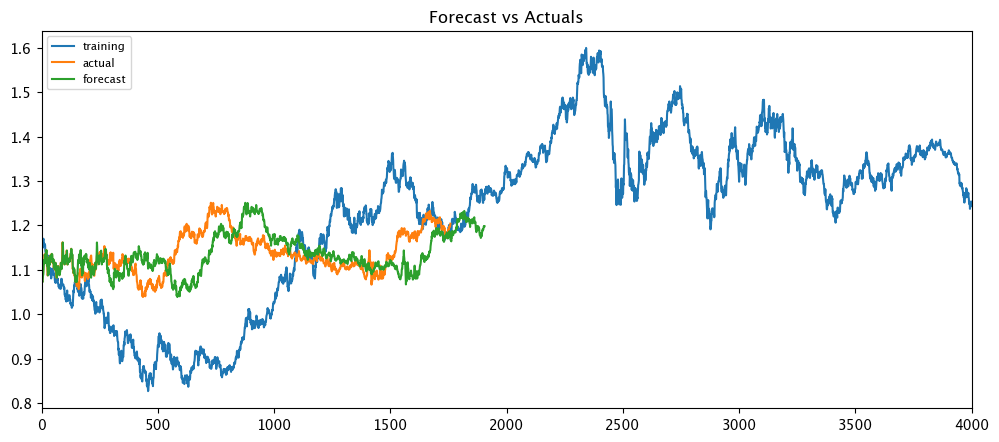

In [21]:
# PLOTTING FORECASTED, TRAINING & ACTUAL 

plt.figure(figsize=(12,5), dpi=100)
plt.plot(TrainingData, label='training')
plt.plot(TestData, label='actual')
plt.plot(Predictions, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim([0, 4000])
plt.show()

In [22]:
# DIAGNOSTICS TO CHECK ACCURACY OF MODEL

from statsmodels.graphics.tsaplots import plot_acf
def forecast_accuracy(Predictions, Actual):
    mape = np.mean(np.abs(Predictions - Actual)/np.abs(Actual))  # MAPE
    rmse = np.mean((Predictions - Actual)**2)**.5  # RMSE
    return({'mape':mape,'rmse':rmse})
fc, se, conf = model_fit.forecast(15, alpha=0.05)  # 95% conf
forecast_accuracy(fc, TestData)

#MAPE value is approx. 6.3%, which means model is about 93.7% accurate. 
#Also have an RMSE of 0.07, which is small and means accuracy. 
# RMSE is better in reflecting performance when dealing with large error values
# Thus RMSE is more telling here 

{'mape': 0.06274841476513758, 'rmse': 0.07990600298966885}

In [ ]:
# Conclusions

#ARIMA model is overall a good fit per metrics tested above. However, there are some things to consider: 

# Input impacting factors of market
# Parameters could have been improved with alternative optimization techniques 
# This is solely dependent on assumptions of ARIMA model 
# Market can change any time